In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [16]:
##!pip install gdown


In [24]:
# import gdown
# ##https://drive.google.com/file/d/1az8HAJd4eDTBcUrXXSSv1k0oMEa4gAN1/view?usp=drive_link
# file_id = "1az8HAJd4eDTBcUrXXSSv1k0oMEa4gAN1"
# url = f"https://drive.google.com/uc?id={file_id}"
# output = "my_file.csv"
# gdown.download(url, output, quiet=False)


In [26]:
data= pd.read_csv('my_file.csv', index_col=0)
labels= pd.read_csv('cancer_rna/labels.csv', index_col=0)

In [30]:
data.head(3)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0


In [28]:
labels.head(2)

,Class
sample_0,PRAD
sample_1,LUAD


In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

In [44]:
from sklearn.decomposition import PCA

## Apply PCA for dimensionality reduction

In [46]:


pca = PCA(n_components=0.95, random_state=99)  # retain 95% variance
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("PCA-reduced shape:", X_pca.shape)


Original shape: (801, 20531)
PCA-reduced shape: (801, 530)


## K-Means clustering on both datasets

In [47]:
from sklearn.cluster import KMeans

# Choose optimal k using Elbow or Silhouette method
k = 5  # example, can be optimized

# Original data
kmeans_orig = KMeans(n_clusters=k, init='k-means++', random_state=99)
y_orig = kmeans_orig.fit_predict(X_scaled)

# PCA-reduced data
kmeans_pca = KMeans(n_clusters=k, init='k-means++', random_state=99)
y_pca = kmeans_pca.fit_predict(X_pca)


## Evaluate clustering performance

In [49]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score

# Silhouette
sil_orig = silhouette_score(X_scaled, y_orig)
sil_pca = silhouette_score(X_pca, y_pca)

# Calinski-Harabasz
ch_orig = calinski_harabasz_score(X_scaled, y_orig)
ch_pca = calinski_harabasz_score(X_pca, y_pca)

# Davies-Bouldin
db_orig = davies_bouldin_score(X_scaled, y_orig)
db_pca = davies_bouldin_score(X_pca, y_pca)

# Adjusted Rand Index (using true labels)
ari_orig = adjusted_rand_score(labels.values.ravel(), y_orig)
ari_pca = adjusted_rand_score(labels.values.ravel(), y_pca)

# Print results
print("Clustering Performance Comparison:")
print(f"{'Metric':<25} {'Original':<15} {'PCA-reduced':<15}")
print(f"{'Silhouette Score':<25} {sil_orig:<15.4f} {sil_pca:<15.4f}")
print(f"{'Calinski-Harabasz':<25} {ch_orig:<15.4f} {ch_pca:<15.4f}")
print(f"{'Davies-Bouldin':<25} {db_orig:<15.4f} {db_pca:<15.4f}")
print(f"{'Adjusted Rand Index':<25} {ari_orig:<15.4f} {ari_pca:<15.4f}")


Clustering Performance Comparison:
Metric                    Original        PCA-reduced    
Silhouette Score          0.1155          0.1474         
Calinski-Harabasz         60.3781         70.4777        
Davies-Bouldin            2.5581          2.5483         
Adjusted Rand Index       0.6863          0.8148         


## Visualizations (2D PCA for plotting)

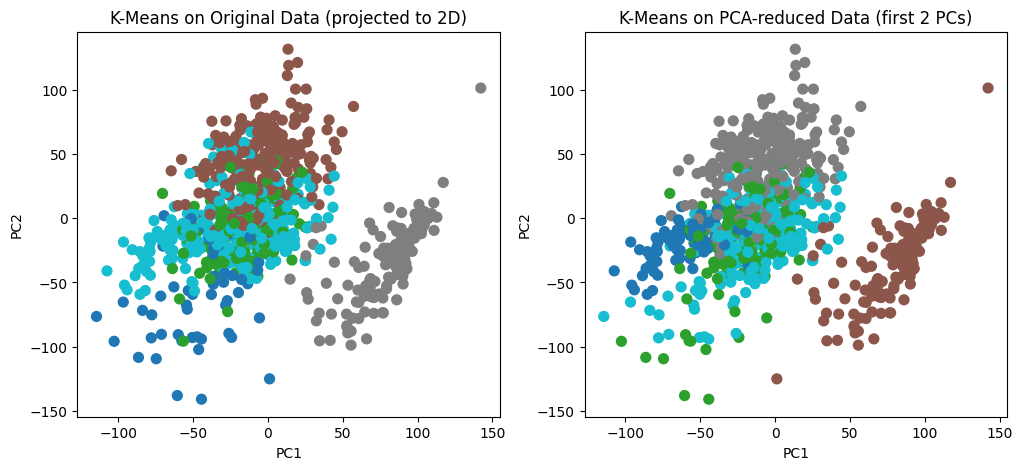

In [50]:
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca_2d = PCA(n_components=2, random_state=99)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(12,5))

# Original K-Means clusters on PCA-2D projection
plt.subplot(1,2,1)
plt.scatter(X_2d[:,0], X_2d[:,1], c=y_orig, cmap='tab10', s=50)
plt.title("K-Means on Original Data (projected to 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")

# PCA-reduced K-Means clusters (already reduced, take first 2 components)
X_pca_2d = X_pca[:,:2]
plt.subplot(1,2,2)
plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=y_pca, cmap='tab10', s=50)
plt.title("K-Means on PCA-reduced Data (first 2 PCs)")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()


Takeaway:

PCA helped improve clustering quality, especially in terms of agreement with true labels (ARI).

Compactness and separation (CH score, DB index) slightly improved.

Silhouette improvement is modest — not unusual in very high-dimensional data where clusters naturally overlap.

PCA also reduced dimensionality from 20,531 to 530, which drastically reduces computational cost for K-Means.

2. Visual Comparison

From the 2D PCA projection (for plotting):

Clusters from PCA-reduced data are more distinct visually.

Original data clusters appear more scattered and overlapping in the 2D projection.

3. Practical Insights

Computational efficiency:

K-Means on 20k+ features is slow. Reducing to ~500 features makes it much faster while preserving or improving cluster quality.

Noise reduction:

PCA removed redundant/noisy genes, which improved clustering alignment with actual cancer types (higher ARI).

Recommendation:

For extremely high-dimensional datasets like RNA-Seq, PCA before clustering is highly beneficial, both for performance and interpretability.

## Hyperparamater
## 1. no of cluster
## ELBOW METHOD

In [32]:
scores=[]
for k in range(1,10):
    model= KMeans(n_clusters=4, random_state=99)
    model.fit(X)

    scores.append(model.inertia_)
    del model

In [33]:

scores = []
K = range(1, 11)   # Try clusters from 1 to 10

for k in K:
    model = KMeans(n_clusters=k, random_state=99)
    model.fit(X)
    scores.append(model.inertia_)  # inertia = sum of squared distances
    del model

In [34]:
scores

[16231464.00000001,
 14820905.640605291,
 13905328.87847832,
 13196381.122679783,
 12453099.854019707,
 12515056.310668198,
 11955498.967337254,
 11457750.953361772,
 11509357.23339626,
 11341115.445612725]

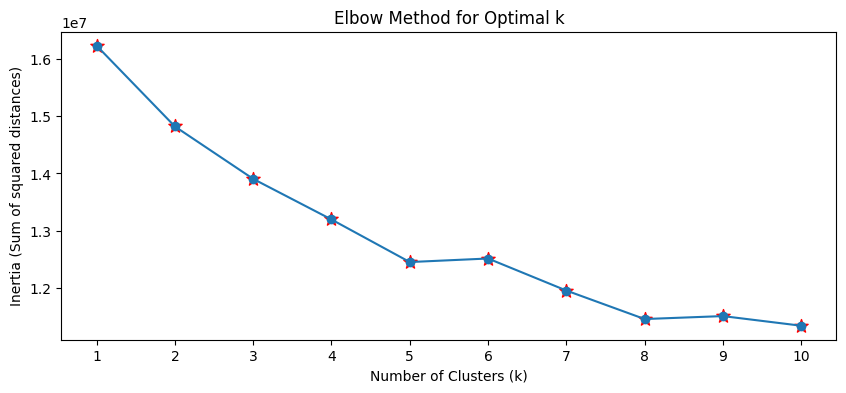

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(K, scores, marker='o')
plt.scatter(K, scores, s=100, c='red', marker='*')  # highlight points
plt.xticks(K)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of squared distances)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [36]:
## KMeans Model

In [37]:
kmeans_model= KMeans(n_clusters=5, init= 'k-means++', random_state= 999)

In [38]:
kmeans_model.fit(X)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,999
,copy_x,True
,algorithm,'lloyd'


In [39]:
kmeans_model.inertia_

12197294.201629208

In [40]:
y_pred= kmeans_model.labels_

In [41]:
from sklearn.metrics import silhouette_score

In [42]:
# Calculate silhouette coefficient
sil_score = silhouette_score(X, y_pred)
print("Silhouette Coefficient:", sil_score)

Silhouette Coefficient: 0.13507290311138614
